Thanks:
- https://www.ahmedbesbes.com/blog/introduction-to-cnns
- https://github.com/sunsided/python-conv2d
- 图片来自 https://en.wikipedia.org/wiki/Sobel_operator
- 画像処理100本ノック!! https://github.com/yoyoyo-yo/Gasyori100knock

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import cv2

image = cv2.imread('./Bikesgray.jpg', cv2.IMREAD_GRAYSCALE).astype(float) / 255.0

In [2]:
def plot_two_images(image1, image2, image1_title='Original image', image2_title='Convolved image'):
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.title(image1_title)
    plt.axis('off')
    plt.imshow(image1, cmap='gray')

    plt.subplot(122)
    plt.title(image2_title)
    plt.axis('off')
    plt.imshow(image2, cmap='gray')

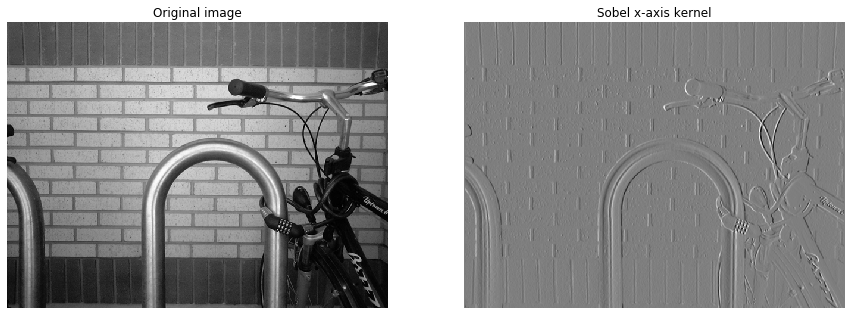

In [3]:
#Sobel x-axis kernel 索贝尔水平滤波器
kernel = np.array([[1, 0, -1], 
                   [2, 0, -2], 
                   [1, 0, -1]])
conv_v = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
plot_two_images(image, conv_v, image2_title='Sobel x-axis kernel')

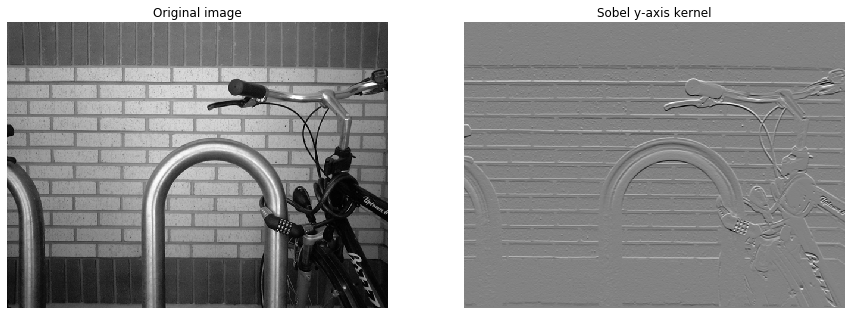

In [4]:
#Sobel y-axis kernel 索贝尔垂直滤波器
kernel = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]])
conv_h = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
plot_two_images(image, conv_h, image2_title='Sobel y-axis kernel')

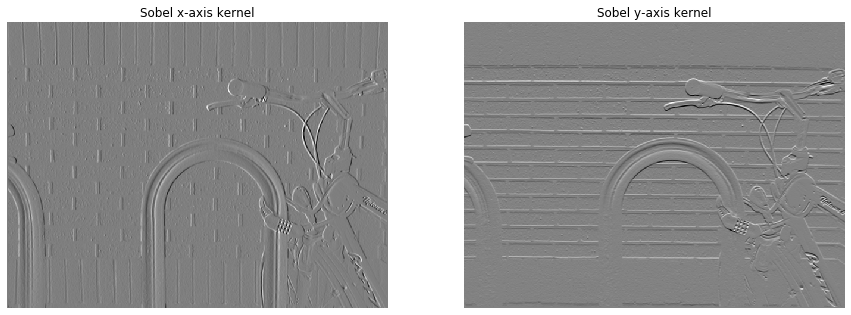

In [5]:
plot_two_images(conv_v, conv_h, 'Sobel x-axis kernel', 'Sobel y-axis kernel')

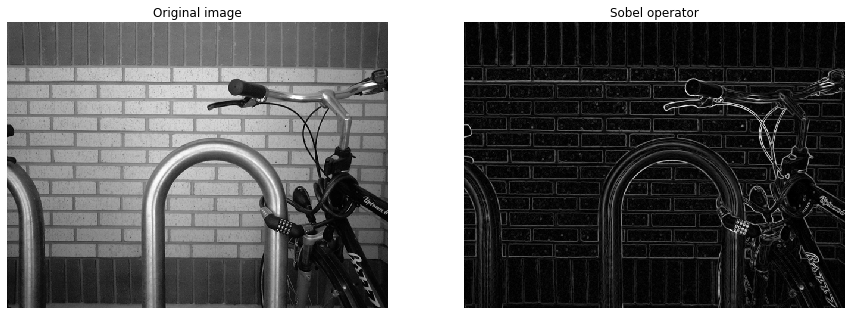

In [6]:
mag = np.hypot(conv_v, conv_h)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

plot_two_images(image, mag, image2_title='Sobel operator')

max pooling

In [7]:
# max pooling
def max_pooling(img, G=2):
    # Max Pooling
    out = img.copy()

    H, W, C = img.shape
    Nh = int(H / G)
    Nw = int(W / G)

    for y in range(Nh):
        for x in range(Nw):
            for c in range(C):
                out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c])

    return out

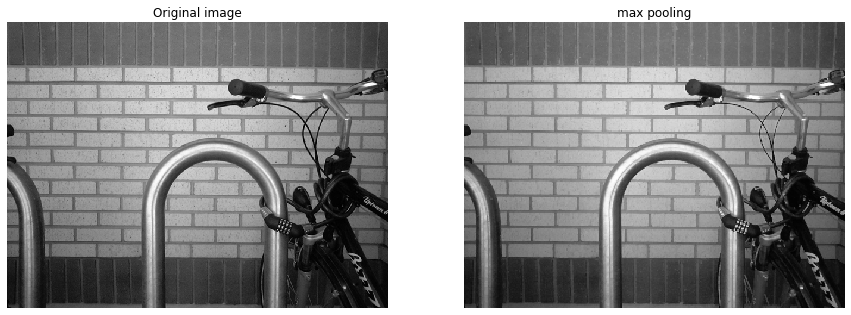

In [9]:
# Max pooling
image_color = cv2.imread('./Bikesgray.jpg').astype(float) / 255.0
image_max_pooling = max_pooling(image_color, 2)
plot_two_images(image_color, image_max_pooling, image2_title='max pooling')